# IE6511 Homework 6
Done by: Aloisius Stephen and Yang Xiaozhou

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=3)

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

## 1.  
The titles of the columns are: <br>
A.	Does at least one perturbation of the current best solution per iteration <br>
B.	Does more than one perturbation from the current best solution per iteration <br>
C.	Uses a distance metric to help pick the point for the expensive evaluation <br>
D.	Uses the surrogate surface to help pick the point for the expensive evaluation<br>

<table>
  <tr>
    <th>Algorithm Name</th>
    <th>A</th>
    <th>B</th>
    <th>C</th>
    <th>D</th>
  </tr>
  <tr>
    <td>DDS</td>
    <td>YES</td> <!-- A -->
    <td>YES</td> <!-- B -->
    <td>NO</td> <!-- C -->
    <td>NO</td> <!-- D -->
  </tr>
  <tr>
    <td>DYCORS-LMSRBF</td>
    <td>YES</td>
    <td>YES</td>
    <td>YES</td>
    <td>YES</td>
  </tr>
  <tr>
    <td>DYCORS-DDSRBF</td>
    <td>YES</td>
    <td>YES</td>
    <td>YES</td>
    <td>YES</td>
  </tr>
  <tr>
    <td>LMSRBF</td>
    <td>YES</td>
    <td>YES</td>
    <td>YES</td>
    <td>YES</td>
  </tr>
    <tr>
    <td>GMSRBF</td>
    <td>NO (at least one candidate points generated <br> BUT independent of current best solution)</td>
    <td>NO (more than one candidate points generated <br> BUT does not come from the current best solution)</td>
    <td>YES</td>
    <td>YES</td>
  </tr>
</table>
<br>

#### Qn: In Figure 3 of the DYCORS paper, DYCORS-LMSRBF performs the best on all four problems and DDS performs the worst.   Explain what you think the reasons are for that performance  in terms of the specific differences between those algorithms.  Is the performance consistent in other figures?  

In general the DDS performs worst because DDS requires a large number of evaluations (iterations) while there is currently limited function evaluation, and the DYCORS algorithm has greater advantage in choosing its point for its next evaluation because it uses the response surface model to estimate the value of the candidate points.

Also, another reason why the performance of DYCORS-LMSRBF is usually better than that of DDS (and the DYCORS-DDSRBF) is most likely because of the adjustment in step size, which is only carried out in DYCORS-LMSRBF. Being able to reduce the perturbation when a certain number of failures in finding better solution occurs means that under DYCORS-LMSRBF, the search is able to look for better solution through finer tuning of the variables, while in DDS it may perturb the variable by too large a value.

#### Qn: What characteristics of your problem and the number of available evaluations would help you select among these 4 algorithms in the table above?

Deciding between DDS and the surrogate methods (DYCORS,LMSRBF,GMSRBF) should be based on the cost of objective function evaluation( which relates to the limitation on the number of available evaluations). If the cost is not too expensive then DDS maybe the better choice. While for problems with expensive functions, choosing between the surrogate methods should be based on other characteristic of the problem.

Either the DYCORS or LMSRBF should be selected if the problem is known or suspected to having localized optimal solution, and for problems with many local optima, where exploration is deemed as beneficial, then the GMSRBF should be considered instead.

And even for expensive functions, if the number of evaluation is very close to the dimensions of the problem then DDS should be selected since the surrogate methods would require evaluations equivalent to at least the number of dimensions to initialise its response surface model, such as using the latin hypercube design which requires at least d+1 function evaluations.

## 2. Making candidate points concrete


Assume you are solving two dimensional problem so Domain is a rectangle length 10 on a side.  and you have previously evaluated the  expensive function  at the following points:   (1,5),(0,4), (6, 1), (3,2).Assume the value of the surrogate is s(x)= (x1  +  2x2 -5)2. (So to simplify in homework, we use a quadratic polynomial rather than an RBF function for surrogate in  this problem).  Assume the current candidate points are  (2,8)). (2,6), (4,0 )  

#### Qn: Which is the point you would select for the next expensive function evaluation in DYCORS-LMSRBF given the weight and the surrogate  in that iteration is  .4? It is OK if you want to use just plot points on a graph to determine the nearest previously evaluated point for each of the candidate points. 

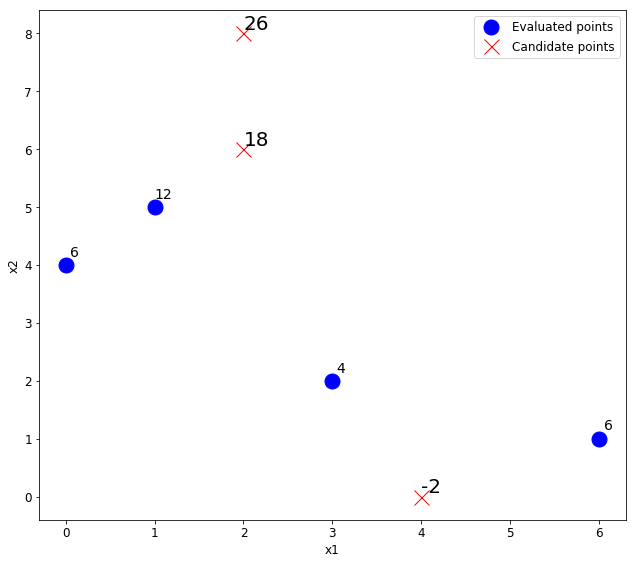

In [2]:
def s(x):
    return (x[0] + 2*x[1] - 5) *2

evalpt = np.array([[1,5],
            [0,4],
            [6,1],
            [3,2]])
evalx1 = evalpt[:,0]
evalx2 = evalpt[:,1]
  
candpt = np.array([[2,8],
            [2,6],
            [4,0]])
candx1 = candpt[:,0]
candx2 = candpt[:,1]    

plt.figure(figsize=[9,8])
plt.plot(evalx1,evalx2,'bo',candx1,candx2,'rx', markersize =15)
for i in range(0,3):
    plt.annotate(str(s(candpt[i])),(candx1[i],candx2[i]),ha ='left',va ='bottom',size = 20)
for i in range(0,4):
    plt.annotate(str(s(evalpt[i])),evalpt[i],xytext=(evalx1[i]+0.1, evalx2[i]+0.1),ha ='center',va ='bottom',size = 14)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Evaluated points','Candidate points'])
plt.tight_layout()

From the above plot, we can see that candidate point (2,8) has the highest estimated function value and furthest distance from the evaluated points, and so the sum of weighted scores for the candidate point (2,8) is the highest amongst the candidate points and should therefore be selected.